<a href="https://colab.research.google.com/github/rajathAgalkote/TedTalksViewsPrediction_MLRegression/blob/main/TED_Talks_Prediction_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **TED Talks Views Prediction**



##### **Project Type**    -Regression
##### **Contribution**    - Individual
##### **Member 1 -** Rajathadri A S

# **Project Summary -**

The project involved data exploration, feature engineering, data cleaning, target encoding and one hot encoding of categorical columns, feature selection, and model building.

After comparing various models, we found that the Lasso Regression model had the best accuracy and was able to prevent overfitting. The mean error was around 34%, but the median error percentage of 13% was considered to measure the accuracy due to outliers. This implies that the model can predict views accurately 87% of the time.

Our analysis showed that the most important feature in predicting views was the speaker_1_avg_views, suggesting that speakers have a direct impact on the number of views a talk receives.

Overall, the project was successful in developing a predictive model that can help TEDx organizers and speakers understand which factors are most important for maximizing the number of views a talk receives, and ultimately spreading innovative ideas and inspiring stories to a wider audience.

# **GitHub Link -**

https://github.com/rajathAgalkote/TedTalksViewsPrediction_MLRegression.git

# **Problem Statement**


TED Talks is a non-profit organization that aims to spread innovative ideas and inspiring stories through short, powerful talks. With over 4,000 talks available on its website, TED attracts millions of viewers from around the world. As a data scientist, my objective is to build a predictive machine learning model that can accurately predict the number of views that a TED Talk will receive.

The dataset provided contains information about each talk, including the speaker, the date, the title, and various metadata. My task is to analyze this data and create a model that can take into account a range of features such as the speaker's occupation, the topic of the talk, its duration, and the number of comments, among others.

The model I develop should be able to accurately predict the number of views for new TED Talks, based on the available data. By understanding which factors are most important for maximizing the number of views a talk receives, this model could help TEDx organizers and speakers increase the reach and impact of their talks, and ultimately spread innovative ideas and inspiring stories to a wider audience.

Throughout the project, I will need to clean and preprocess the data, engineer new features, select an appropriate regression model, train and fine-tune the model, and evaluate its performance using suitable metrics. My ultimate goal is to create a model that can accurately predict the number of views for TED Talks and help TEDx achieve its mission of spreading ideas worth sharing.

# **Objective -**


The main objective of this project is to build a predictive ML model, that can help predict the number of views of the videos uploaded on the TEDx Website.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# Data Wrangling Libraries
import numpy as np
import pandas as pd

# Graphing/Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from scipy.stats import norm
from scipy.stats import skewnorm
from scipy.stats import uniform
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f

# Pickle library
import pickle

# Miscellaneous libraries
import ast
import warnings
from google.colab import drive
from datetime import datetime
import datetime as dt 
import calendar

In [ ]:
# Setting plot theme
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (7,4)
plt.rcParams['figure.facecolor'] = '#00000000'
plt.rcParams['image.cmap'] = 'plasma'
plt.rcParams["figure.autolayout"] = True

In [ ]:
# Ignoring all warnings

warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# upload Dataset

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Project_Regression/data_ted_talks.csv")

In [ ]:
raw_data = df

### Dataset First View

In [ ]:
# Dataset First Look

raw_data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

raw_data.shape

(4005, 19)

In [ ]:
# The DataFrame has 19 features and 4005 entries.

### Dataset Information

In [ ]:
# Dataset Info

raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(raw_data[raw_data.duplicated()])

0

In [ ]:
#There are no duplicate entries in the DataFrame

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(raw_data.isnull().sum())

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


<AxesSubplot:>

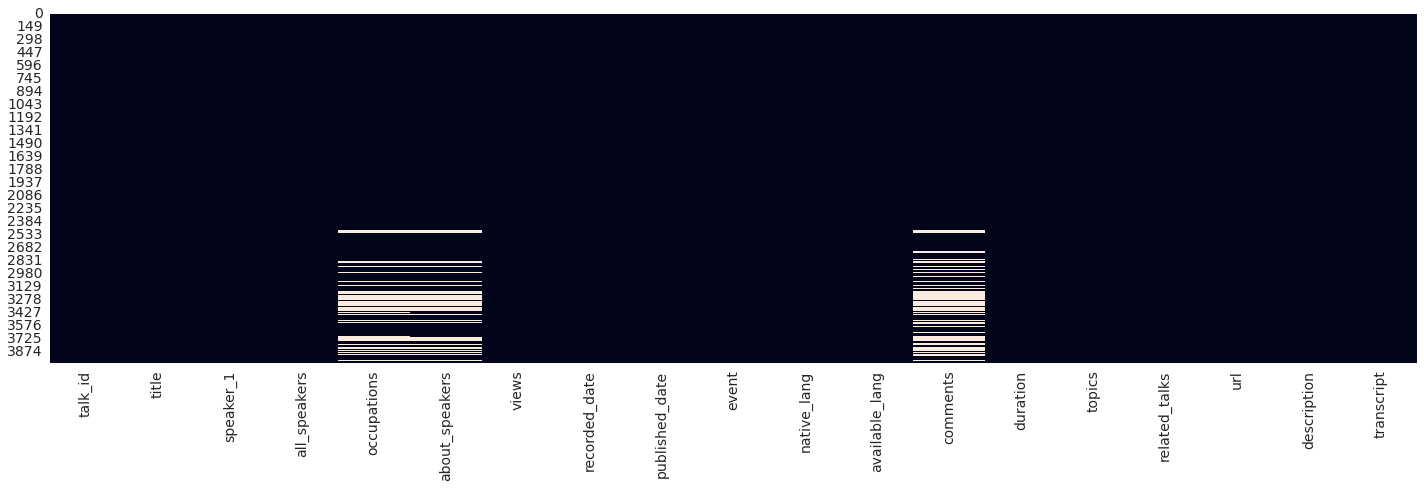

In [ ]:
# Visualizing the missing values

plt.figure(figsize=(20,7))
sns.heatmap(raw_data.isnull(), cbar=False)

Heatmap confirms NULL values in several features.

### What did you know about your dataset?

Pointers :    

1. There are 19 features/columns and 4005 entries.
2. There are NO duplicate entries.
3. There are NULL values in the following columns:
  * all_speakers : 4
  * occupations : 522
  * about_speakers : 503
  * recorded_date : 1
  * comments : 655

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

raw_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
# Dataset Describe

raw_data.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


### Variables Description 

***talk_id*** : identification number provided by TED (int)

***title*** : Title of the talk (string)

***speaker_1*** : First speaker in TED's speaker list (string)

***speakers*** : Speakers in the talk (dictionary)

***occupations*** : Occupations of the speakers (dictionary)

***about_speakers*** : Blurb about each speaker (dictionary)

***views*** : Count of views / (int) -- **(Dependent Variable)**

***recorded_date*** : Date the talk was recorded (string)

***published_date*** : Date the talk was published to TED.com (string)

***event*** : Event or medium in which the talk was given (string)

***native_lang*** Language the talk was given in (string)

***available_lang*** : All available languages (lang_code) for a talk (list)

***comments*** : Count of comments (int)

***duration*** : Duration in seconds (int)

***topics*** : Related tags or topics for the talk (list)

***related_talks*** : Related talks (key='talk_id', value='title') (dictionary)

***url*** : URL of the talk (string)

***description*** : Description of the talk (string)

***transcript*** : Full transcript of the talk (string)

**The dictionary key maps to the speaker in ‘speakers’.**

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in raw_data.columns.tolist():
  print("Unique values in ",i,": ",raw_data[i].nunique())

Unique values in  talk_id :  4005
Unique values in  title :  4005
Unique values in  speaker_1 :  3274
Unique values in  all_speakers :  3306
Unique values in  occupations :  2049
Unique values in  about_speakers :  2977
Unique values in  views :  3996
Unique values in  recorded_date :  1334
Unique values in  published_date :  2962
Unique values in  event :  459
Unique values in  native_lang :  12
Unique values in  available_lang :  3902
Unique values in  comments :  601
Unique values in  duration :  1188
Unique values in  topics :  3977
Unique values in  related_talks :  4005
Unique values in  url :  4005
Unique values in  description :  4005
Unique values in  transcript :  4005


In [ ]:
# There are 12 different native_lang entries

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [ ]:
today=datetime.now()
today.strftime('%Y-%m-%d')

'2023-02-24'

In [ ]:
# The format of recorded_date and published_date are in string format, we have to convert them into date format

# Recorded date formatting:
raw_data['recorded_date']= pd.to_datetime(raw_data['recorded_date'])
# Published date formatting:
raw_data['published_date']= pd.to_datetime(raw_data['published_date'])

In [ ]:
raw_data[['recorded_date','published_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   recorded_date   4004 non-null   datetime64[ns]
 1   published_date  4005 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 62.7 KB


In [ ]:
# Number of days Ted talk has been published
last_publishing_date= raw_data['published_date'].max()
raw_data['time_passed_since_published']= last_publishing_date - pd.DatetimeIndex(raw_data['published_date'])

In [ ]:
# Creating new columns for published year, month, day and weekday
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
raw_data['publish_month'] = pd.DatetimeIndex(raw_data['published_date']).month
raw_data['publish_month'] = raw_data['publish_month'].apply(lambda x: calendar.month_abbr[x])
raw_data['publish_year'] = pd.DatetimeIndex(raw_data['published_date']).year
raw_data['publish_day'] = pd.DatetimeIndex(raw_data['published_date']).day
raw_data['publish_week_day']= raw_data['published_date'].apply(lambda x: day_order[dt.date(x.year, x.month, x.day).weekday()])

In [ ]:
# Creating variable for Daily Views(Target)

# Daily views/Talk:
raw_data['daily_views'] = raw_data['views'] / ( raw_data['time_passed_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
raw_data[['publish_month','publish_year','publish_day','publish_week_day','daily_views']].head()

,publish_month,publish_year,publish_day,publish_week_day,daily_views
0,Jun,2006,27,Tue,696.735614
1,Jun,2006,27,Tue,2867.645837
2,Jun,2006,27,Tue,379.836267
3,Jun,2006,27,Tue,526.808187
4,Jun,2006,27,Tue,12863.744117


In [ ]:
# New features have been created for "published_date"

### What all manipulations have you done and insights you found?

We will continue manipulating data until Model preparations.

For now, we have converted "recorded_date" and "published_date" into datetime dtype.

Then we created a new feature "time_passed_since_published" with the number of days since the last video was published.

Then split published_date into its respective month, year, date and weekday.

Then we created another feature daily_views with view-rate per day. 

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Univariate Analysis

To check density of distributions.

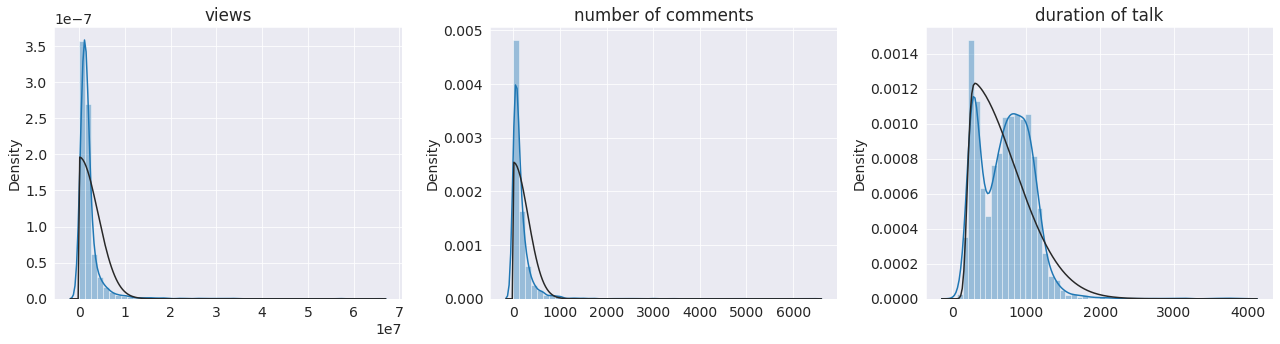

In [ ]:
# Chart - 1 visualization code

# Univariate Analysis for continuous variables

fig = plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.title("views")
sns.distplot(x= raw_data['views'], fit = skewnorm)

plt.subplot(1,3,2)
plt.title("number of comments")
sns.distplot(x= raw_data['comments'], fit = skewnorm)

plt.subplot(1,3,3)
plt.title("duration of talk")   
sns.distplot(x= raw_data['duration'], fit = skewnorm)

plt.show()

Data in views, no. of comments and duration of talk are right skewed, as expected.

##### 1. Why did you pick the specific chart?

We have used distplot here to observe the distribution of data in the above features.

##### 2. What is/are the insight(s) found from the chart?

We had expected these features to be right-skewed (Positive skew) and we can confirm the same.



---



#### Chart - 2

Bivariate analysis with dependent variable (views)

In [ ]:
# Chart - 2 visualization code
# Multiple plots for Bivariate analysis

##### speaker_1 vs daily_views


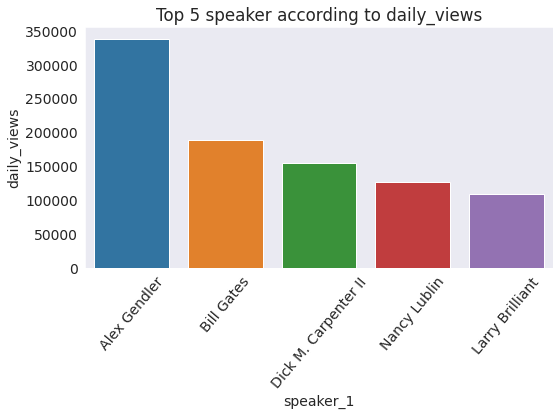

In [ ]:
#top 5 speakers

temp=raw_data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

The top 5 first-speakers with the highest views-per-day are as shown above.

##### Speaker Vs Number of talks delivered

In [ ]:
# Creating a new dataset with all speakers
data_speaker_count=pd.DataFrame(raw_data['speaker_1'].value_counts()).reset_index().rename(columns=({'index':'Speaker','speaker_1':'Number of talks'}))

In [ ]:
data_speaker_count.head()

,Speaker,Number of talks
0,Alex Gendler,34
1,Iseult Gillespie,19
2,Emma Bryce,12
3,Daniel Finkel,11
4,Alex Rosenthal,10


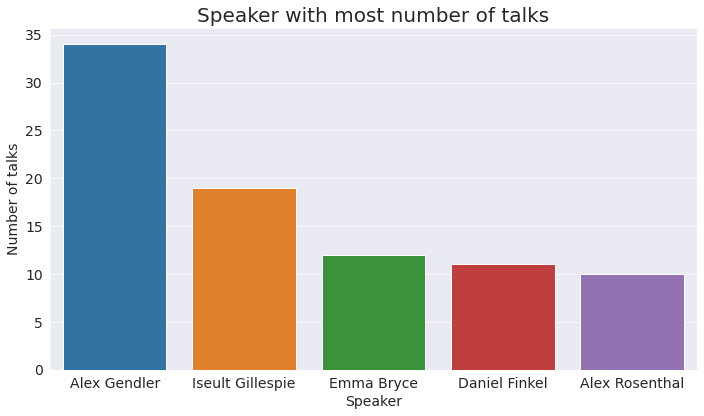

In [ ]:
# plot for number of talks vs speaker

most_talks = data_speaker_count.nlargest(5, 'Number of talks')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker', y = 'Number of talks', data = most_talks)
plt.title('Speaker with most number of talks',fontsize=20)
plt.show()

All speakers with most number of talks.

##### Speakers vs duration

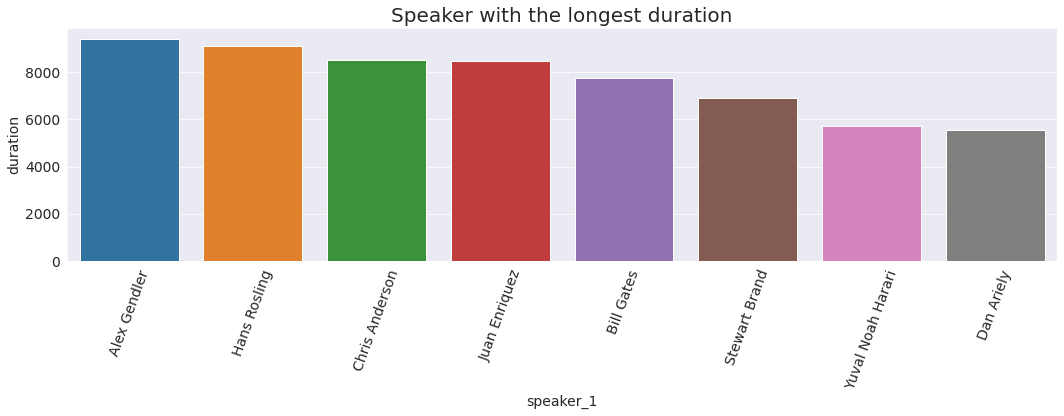

In [ ]:
# Let us also calculate the duration of individual speakers

temp=raw_data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=raw_data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70)
plt.title('Speaker with the longest duration',fontsize=20);

Speakers with longest durations of total talks

##### Speaker_1 vs total number of comments

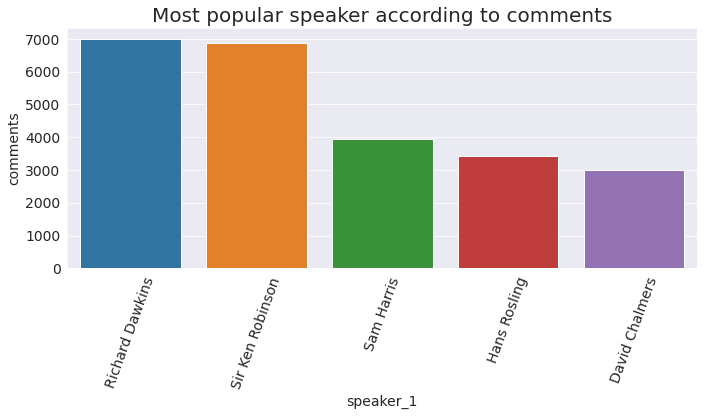

In [ ]:
# Speaker_1 vs total number of comments

temp=raw_data.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=70);
plt.title('Most popular speaker according to comments',fontsize=20)
plt.show()     

Speaker_1 with most comments

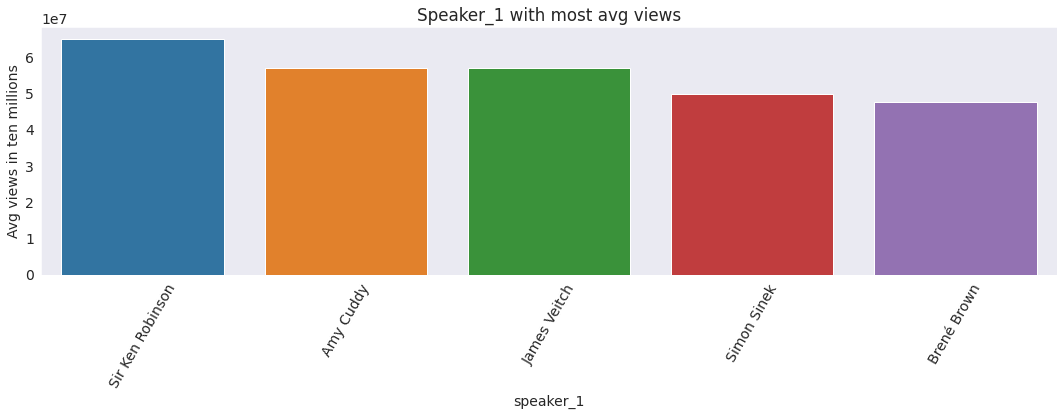

In [ ]:
# Speaker most popular video
temp=raw_data[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Speaker_1 with most avg views')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

speakers with most average view per video.

##### 1. Why did you pick the specific chart?

We have used barplots for bivariate analysis, since it is the most basic and effective plot used to observe the counts/sum values of categorical data.

##### 2. What is/are the insight(s) found from the chart?

We have observed the behaviour of speaker_1 with various other features that might be a determining factor affecting the number of views.

#### Chart - 3

Target Encoding

Target encoding can be included as an integral part of Data Wrangling as well. But, we will include it here as it involves a lot of visualization aspect as well.

*Target encoding is the process of replacing a catgorical variable values with the mean of the target (dependent variable) variable*


The categorical features that needs to be encoded are:
  1. speaker_1
  2. event
  3. available_language
  4. num_of_topic
  5. unique_topics
  6. related_talks
  7. time_passed_since_public

In [ ]:
# Chart - 3 visualization code

# Encode categorical columns
# There are several (7) categorical varibles. We will perform Target Encoding on all varibles individually

##### Target Encoding on **speaker_1**

In [ ]:
# Applying Target encoding on speaker_1
# Speaker_1 encoding by considering average views per speaker


speaker=raw_data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
raw_data['speaker_1_avg_views']=raw_data['speaker_1'].map(speaker)

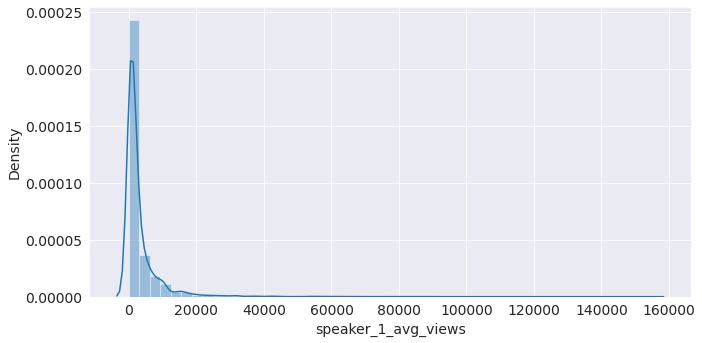

In [ ]:
# plot for the same
plt.figure(figsize=(10,5))
sns.distplot(raw_data['speaker_1_avg_views'])
plt.show()

speaker_1 (categorical variable) has been mapped to speaker_1_avg_views (numerical variable)

##### Target Encoding on **event**

In [ ]:
# Applying Target encoding on event
# Event is also a catagorical variable, therefore we also apply target encoding on it.

event=raw_data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
raw_data['event_wise_avg_views']=raw_data['event'].map(event)

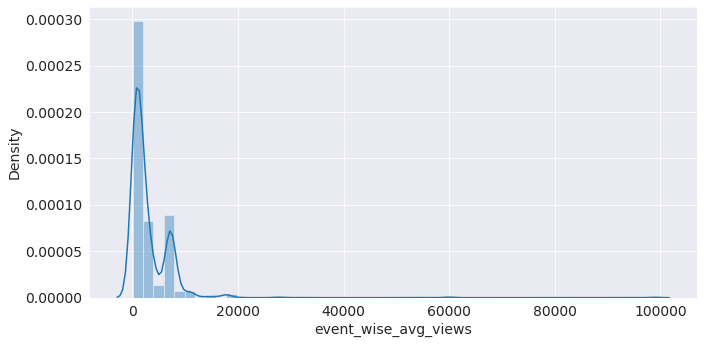

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['event_wise_avg_views'])
plt.show()

speaker_1 (categorical variable) has been mapped to speaker_1_avg_views (numerical variable)

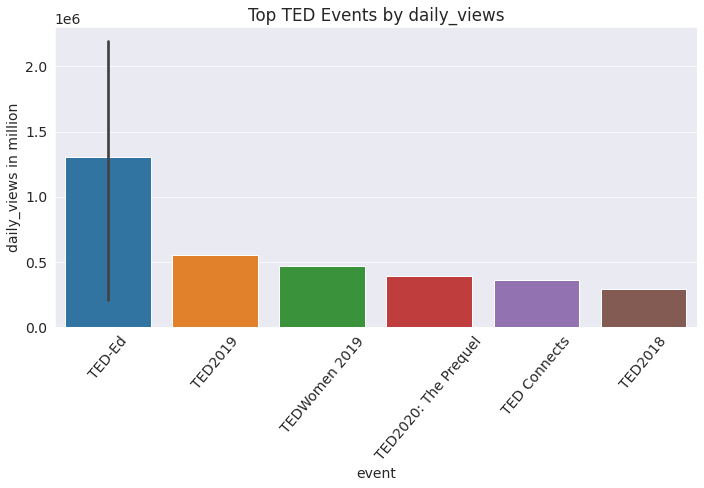

In [ ]:
# Top 10 events are:

temp=raw_data.groupby(['event','publish_year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,7))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

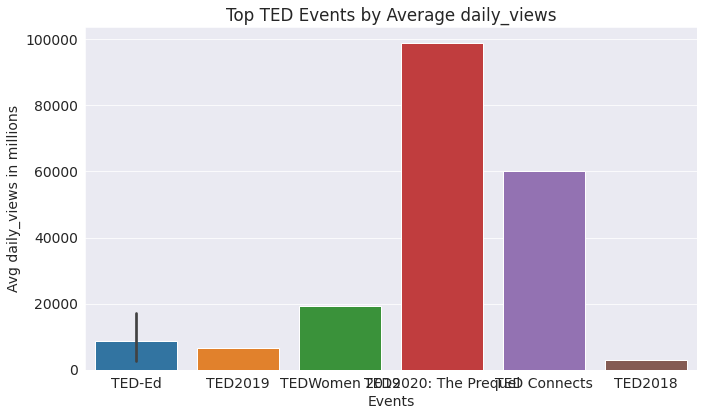

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by Average daily_views')
plt.xlabel('Events')
plt.ylabel('Avg daily_views in millions')
plt.show()

##### Target Encoding on **available_language**

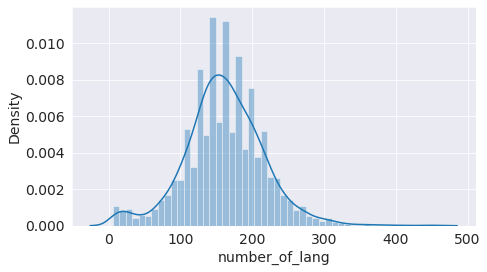

In [ ]:
# Applying Target encoding on available_language

# Avaliable_language categorical-numerical
# using a simple len() function

raw_data['number_of_lang'] = raw_data['available_lang'].apply(lambda x: len(x))
sns.distplot(raw_data['number_of_lang'])
plt.show()

available_lang (categorical variable) has been mapped to number_of_lang (numerical variable)

##### Target Encoding on **num_of_topic** form **topic** variable

<AxesSubplot:xlabel='num_of_topics', ylabel='Density'>

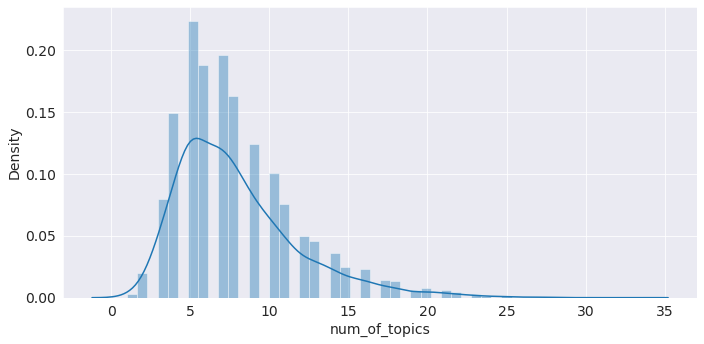

In [ ]:
# Applying Target encoding on num_of_topic

raw_data['topics'] = raw_data.apply(lambda x: eval(x['topics']), axis=1)
raw_data['num_of_topics'] = raw_data.apply(lambda x: len(x['topics']), axis=1)
# graph:
plt.figure(figsize=(10,5))
sns.distplot(raw_data['num_of_topics'])

topics (categorical variable) has been mapped to number_of_topics (numerical variable)

In [ ]:
#Checking for number of unique topic

unique_topics=[]
for i in range(0,len(raw_data)):
  temp=raw_data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

##### Target Encoding on **unique_topics**

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(raw_data)):
    temp2=raw_data['topics'][i]
    if(topic in temp2):
      temp+=raw_data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

Average views on Unique topics are stored in DICT unique_topics_avg_view_dict

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(raw_data)):
  temp=0
  temp_topic=raw_data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
raw_data['topics_wise_avg_views'] = se.values

<AxesSubplot:xlabel='topics_wise_avg_views', ylabel='Density'>

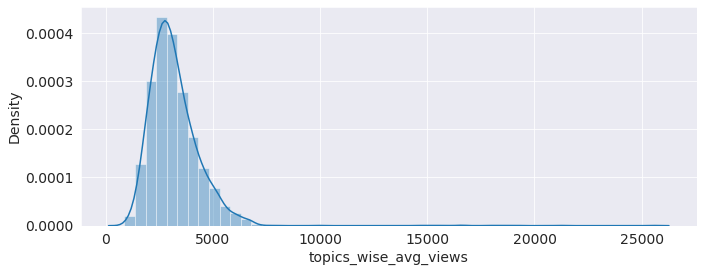

In [ ]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(raw_data['topics_wise_avg_views'])

average views per unique topics are stored in topics_wise_avg_views variable (Numerical Feature)

##### Target Encoding on **related_talks**

In [ ]:
raw_data['related_talks'] = raw_data['related_talks'].apply(lambda x: ast.literal_eval(x))

In [ ]:
# Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value. 
# Taking mean of all realated talk videos views

In [ ]:
#defining a new feature called related_views
raw_data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in raw_data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(raw_data)):
      if (raw_data.loc[i,'talk_id']) in id_list:
        temp+=raw_data.loc[i,'daily_views']

    raw_data.loc[index,'related_views']=temp//6

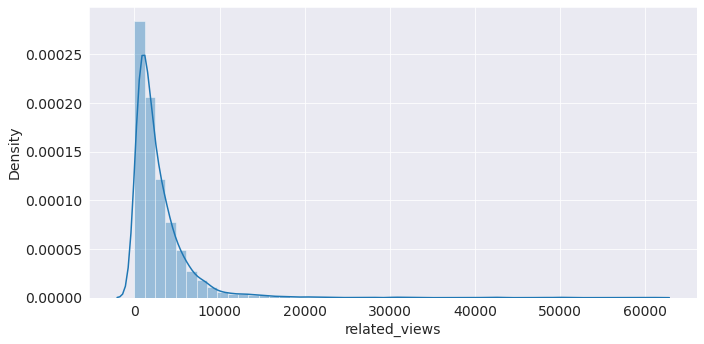

In [ ]:
#Graph of related_views

plt.figure(figsize=(10,5))
sns.distplot(raw_data['related_views'])
plt.show()

related_topics (categorical variable) has been mapped to related_views (numerical variable)

##### Target Encoding on **time_passed_since_published**

In [ ]:
# Converting time_passed_since_published into integer

raw_data['time_passed_since_published'] = raw_data['time_passed_since_published'].dt.days.astype('int16')

##### 1. Why did you pick the specific chart?

We have extensively made use of "distplot" to observe the distribution of our newly encoded features.

##### 2. What is/are the insight(s) found from the chart?

We can visualize from the distplots that the distributions of the newly encoded plots are not normal. These features needs to be normalized before they are used to train the ML model.

#### DataSet Glance

In [ ]:
# Let us have a glance at the Dataset

raw_data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,publish_year,publish_day,publish_week_day,daily_views,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,topics_wise_avg_views,related_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,2006,27,Tue,696.735614,699.725014,782.72889,270,9,2432.0,3093
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,2006,27,Tue,2867.645837,1098.925286,782.72889,303,11,2546.0,865


In [ ]:
raw_data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'number_of_lang', 'num_of_topics',
       'topics_wise_avg_views', 'related_views'],
      dtype='object')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   talk_id                      4005 non-null   int64         
 1   title                        4005 non-null   object        
 2   speaker_1                    4005 non-null   object        
 3   all_speakers                 4001 non-null   object        
 4   occupations                  3483 non-null   object        
 5   about_speakers               3502 non-null   object        
 6   views                        4005 non-null   int64         
 7   recorded_date                4004 non-null   datetime64[ns]
 8   published_date               4005 non-null   datetime64[ns]
 9   event                        4005 non-null   object        
 10  native_lang                  4005 non-null   object        
 11  available_lang               4005 non-null 

## ***6. Feature Engineering & Data Pre-processing***

### We will first verify OLS assumptions.
### Then we will handle missing values and outliers.

### 1. Verifying OLS Assumptions


In [ ]:
# Verifying OLS Assumptions

#### 1. Linearity

Target and Predictors must have a linear relationships



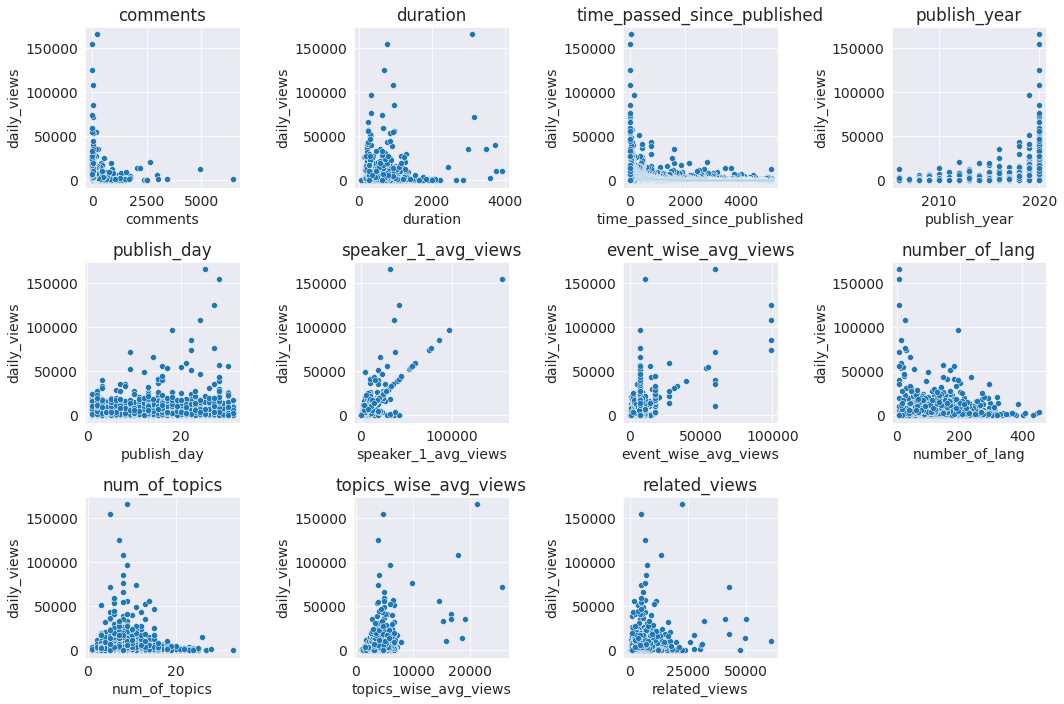

In [ ]:
# checking for Linearity
      
fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title("comments")
sns.scatterplot(raw_data['comments'],raw_data['daily_views'])

plt.subplot(3,4,2)                   
plt.title("duration")
sns.scatterplot(raw_data['duration'],raw_data['daily_views'])

plt.subplot(3,4,3)
plt.title("time_passed_since_published")
sns.scatterplot(raw_data['time_passed_since_published'],raw_data['daily_views'])

plt.subplot(3,4,4)
plt.title("publish_year")
sns.scatterplot(raw_data['publish_year'],raw_data['daily_views'])

plt.subplot(3,4,5)
plt.title("publish_day")
sns.scatterplot(raw_data['publish_day'],raw_data['daily_views'])

plt.subplot(3,4,6)
plt.title("speaker_1_avg_views")
sns.scatterplot(raw_data['speaker_1_avg_views'],raw_data['daily_views'])

plt.subplot(3,4,7)
plt.title("event_wise_avg_views")
sns.scatterplot(raw_data['event_wise_avg_views'],raw_data['daily_views'])

plt.subplot(3,4,8)
plt.title("number_of_lang")
sns.scatterplot(raw_data['number_of_lang'],raw_data['daily_views'])

plt.subplot(3,4,9)
plt.title("num_of_topics")
sns.scatterplot(raw_data['num_of_topics'],raw_data['daily_views'])

plt.subplot(3,4,10)
plt.title("topics_wise_avg_views")
sns.scatterplot(raw_data['topics_wise_avg_views'],raw_data['daily_views'])

plt.subplot(3,4,11)
plt.title("related_views")
sns.scatterplot(raw_data['related_views'],raw_data['daily_views'])

plt.tight_layout()
plt.show()


When we check for the linearity of the scatterplot, we realise that the distinct variables are randomly distributed throughout.

They are not linear!

And they have no distinct pattern.

##### Transformation for Linearity

In [ ]:
# Log transformation to the following:

# daily_views
# comments
# speaker_1_avg_views
# event_wise_avg_views
# duration
# topics_wise_avg_views
# related_views

In [ ]:
# Transformation
raw_data['log_daily_views']=np.log(raw_data['daily_views'])
raw_data['log_comments']=np.log(raw_data['comments'])
raw_data['log_speaker_1_avg_views']=np.log(raw_data['speaker_1_avg_views'])
raw_data['log_event_wise_avg_views']=np.log(raw_data['event_wise_avg_views'])

In [ ]:
raw_data['log_duration']=np.log(raw_data['duration'])
raw_data['log_topics_wise_avg_views']=np.log(raw_data['topics_wise_avg_views'])
raw_data['log_related_views']=np.log(raw_data['related_views'])

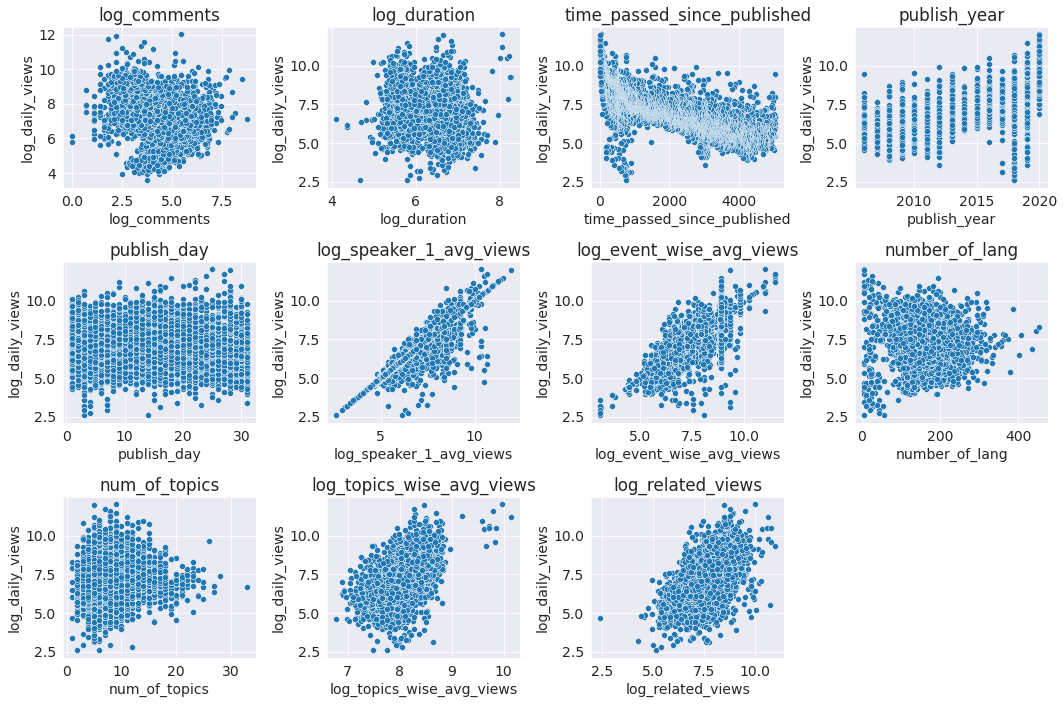

In [ ]:
#  Checking for Linearity

fig = plt.figure(figsize=(15,10))

plt.subplot(3,4,1)
plt.title("log_comments")
sns.scatterplot(raw_data['log_comments'],raw_data['log_daily_views'])

plt.subplot(3,4,2)
plt.title("log_duration")
sns.scatterplot(raw_data['log_duration'],raw_data['log_daily_views'])

plt.subplot(3,4,3)
plt.title("time_passed_since_published")
sns.scatterplot(raw_data['time_passed_since_published'],raw_data['log_daily_views'])

plt.subplot(3,4,4)
plt.title("publish_year")
sns.scatterplot(raw_data['publish_year'],raw_data['log_daily_views'])

plt.subplot(3,4,5)
plt.title("publish_day")
sns.scatterplot(raw_data['publish_day'],raw_data['log_daily_views'])

plt.subplot(3,4,6)
plt.title("log_speaker_1_avg_views")
sns.scatterplot(raw_data['log_speaker_1_avg_views'],raw_data['log_daily_views'])

plt.subplot(3,4,7)
plt.title("log_event_wise_avg_views")
sns.scatterplot(raw_data['log_event_wise_avg_views'],raw_data['log_daily_views'])


plt.subplot(3,4,8)
plt.title("number_of_lang")
sns.scatterplot(raw_data['number_of_lang'],raw_data['log_daily_views'])

plt.subplot(3,4,9)
plt.title("num_of_topics")
sns.scatterplot(raw_data['num_of_topics'],raw_data['log_daily_views'])

plt.subplot(3,4,10)
plt.title("log_topics_wise_avg_views")
sns.scatterplot(raw_data['log_topics_wise_avg_views'],raw_data['log_daily_views'])

plt.subplot(3,4,11)
plt.title("log_related_views")
sns.scatterplot(raw_data['log_related_views'],raw_data['log_daily_views'])


plt.tight_layout()
plt.show()

Not all features show linearity with the target and also many feature are showing hetroscedasticity.

#### 2. Outliers Detection

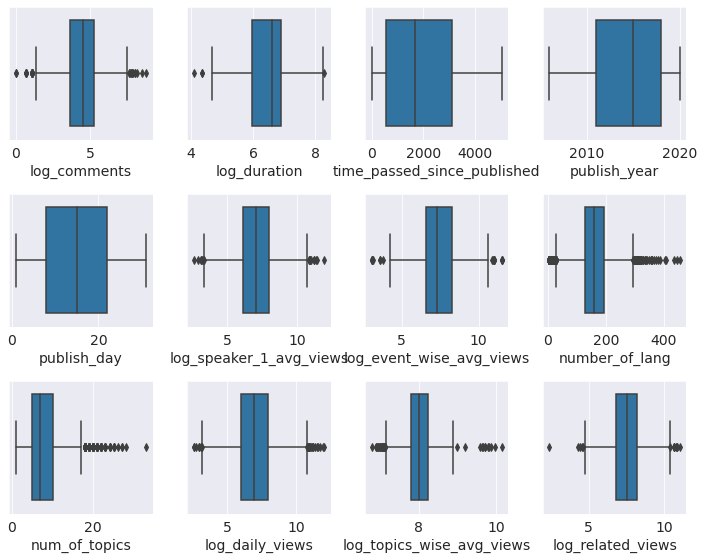

In [ ]:
# Boxplots to detect outliers 

fig = plt.figure(figsize=(10,8))

plt.subplot(3,4,1)
#plt.title("log_comments")
sns.boxplot(x= raw_data['log_comments'])

plt.subplot(3,4,2)
#plt.title("duration")
sns.boxplot(x= raw_data['log_duration'])

plt.subplot(3,4,3)
#plt.title("time_passed_since_published")
sns.boxplot(x= raw_data['time_passed_since_published'])

plt.subplot(3,4,4)
#plt.title("publish_year")
sns.boxplot(x= raw_data['publish_year'])

plt.subplot(3,4,5)
#plt.title("publish_day")
sns.boxplot(x= raw_data['publish_day'])

plt.subplot(3,4,6)
#plt.title("log_speaker_1_avg_views")
sns.boxplot(x= raw_data['log_speaker_1_avg_views'])

plt.subplot(3,4,7)
#plt.title("log_event_wise_avg_views")
sns.boxplot(x= raw_data['log_event_wise_avg_views'])


plt.subplot(3,4,8)
#plt.title("number_of_lang")
sns.boxplot(x= raw_data['number_of_lang'])

plt.subplot(3,4,9)
#plt.title("num_of_topics")
sns.boxplot(x= raw_data['num_of_topics'])

plt.subplot(3,4,10)
#plt.title("log_daily_views")
sns.boxplot(x= raw_data['log_daily_views'])

plt.subplot(3,4,11)
#plt.title("log_topics_wise_avg_views")
sns.boxplot(x= raw_data['log_topics_wise_avg_views'])

plt.subplot(3,4,12)
#plt.title("log_related_views")
sns.boxplot(x= raw_data['log_related_views'])

plt.tight_layout()
plt.show()

From the boxplot, we can see occurrences of outliers is some features.

We will take these features and define new dataframes which exclude most of the outliers.

In [ ]:
# removing outliers from log_comments
q_low = raw_data['log_comments'].quantile(0.01)
q_hi  = raw_data['log_comments'].quantile(0.99)

df_1 = raw_data[(raw_data['log_comments'] < q_hi) & (raw_data['log_comments'] > q_low)]

In [ ]:
# removing outliers from log_duration
q_low = df_1["log_duration"].quantile(0.01)
q_hi  = df_1["log_duration"].quantile(0.99)

df_2 = df_1[(df_1["log_duration"] < q_hi) & (df_1["log_duration"] > q_low)]

In [ ]:
# removing outliers from log_speaker_1_avg_views
q_low = df_2["log_speaker_1_avg_views"].quantile(0.01)
q_hi  = df_2["log_speaker_1_avg_views"].quantile(0.99)

df_3 = df_2[(df_2["log_speaker_1_avg_views"] < q_hi) & (df_2["log_speaker_1_avg_views"] > q_low)]

In [ ]:
# removing outliers from log_event_wise_avg_views
q_low = df_3["log_event_wise_avg_views"].quantile(0.01)
q_hi  = df_3["log_event_wise_avg_views"].quantile(0.99)

df_4 = df_3[(df_3["log_event_wise_avg_views"] < q_hi) & (df_3["log_event_wise_avg_views"] > q_low)]

In [ ]:
# removing outliers from number_of_lang
q_low = df_4["number_of_lang"].quantile(0.01)
q_hi  = df_4["number_of_lang"].quantile(0.99)

df_5 = df_4[(df_4["number_of_lang"] < q_hi) & (df_4["number_of_lang"] > q_low)]

In [ ]:
# removing outliers from num_of_topics
q_hi  = df_5["num_of_topics"].quantile(0.99)

df_6 = df_5[df_5["num_of_topics"] < q_hi]
     

In [ ]:
# removing outliers from log_daily_views
q_low = df_6["log_daily_views"].quantile(0.01)
q_hi  = df_6["log_daily_views"].quantile(0.99)

df_7 = df_6[(df_6["log_daily_views"] < q_hi) & (df_6["log_daily_views"] > q_low)]

In [ ]:
# removing outliers from log_topics_wise_avg_views
q_low = df_7["log_topics_wise_avg_views"].quantile(0.01)
q_hi  = df_7["log_topics_wise_avg_views"].quantile(0.99)

df_8 = df_7[(df_7["log_topics_wise_avg_views"] < q_hi) & (df_7["log_topics_wise_avg_views"] > q_low)]

In [ ]:
# removing outliers from log_related_views
q_low = df_8["log_related_views"].quantile(0.01)
q_hi  = df_8["log_related_views"].quantile(0.99)

df_filtered = df_8[(df_8["log_related_views"] < q_hi) & (df_8["log_related_views"] > q_low)]

New Boxplot

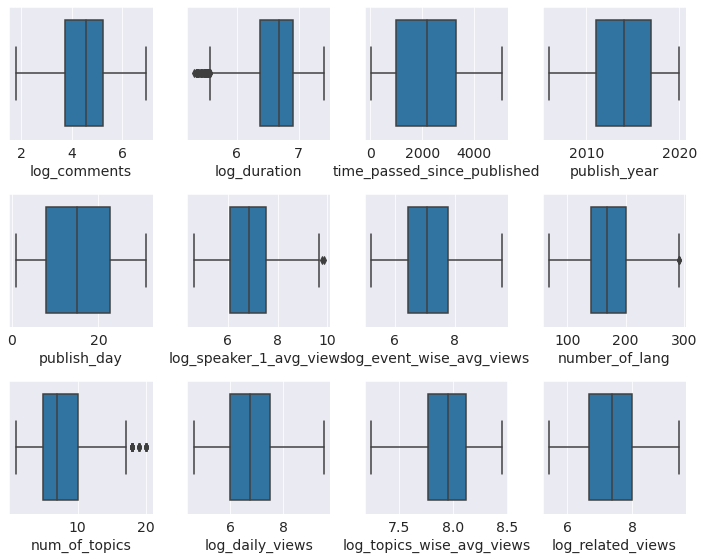

In [ ]:
# New Boxplots
fig = plt.figure(figsize=(10,8))

plt.subplot(3,4,1)
#plt.title("log_comments")
sns.boxplot(x= df_filtered['log_comments'])

plt.subplot(3,4,2)
#plt.title("duration")
sns.boxplot(x= df_filtered['log_duration'])

plt.subplot(3,4,3)
#plt.title("time_passed_since_published")
sns.boxplot(x= df_filtered['time_passed_since_published'])

plt.subplot(3,4,4)
#plt.title("publish_year")
sns.boxplot(x= df_filtered['publish_year'])

plt.subplot(3,4,5)
#plt.title("publish_day")
sns.boxplot(x= df_filtered['publish_day'])

plt.subplot(3,4,6)
#plt.title("log_speaker_1_avg_views")
sns.boxplot(x= df_filtered['log_speaker_1_avg_views'])

plt.subplot(3,4,7)
#plt.title("log_event_wise_avg_views")
sns.boxplot(x= df_filtered['log_event_wise_avg_views'])


plt.subplot(3,4,8)
#plt.title("number_of_lang")
sns.boxplot(x= df_filtered['number_of_lang'])

plt.subplot(3,4,9)
#plt.title("num_of_topics")
sns.boxplot(x= df_filtered['num_of_topics'])

plt.subplot(3,4,10)
#plt.title("log_daily_views")
sns.boxplot(x= df_filtered['log_daily_views'])

plt.subplot(3,4,11)
#plt.title("log_topics_wise_avg_views")
sns.boxplot(x= df_filtered['log_topics_wise_avg_views'])

plt.subplot(3,4,12)
#plt.title("log_related_views")
sns.boxplot(x= df_filtered['log_related_views'])

plt.tight_layout()
plt.show()

As we can observe above, most of the outliers have been removed.

#### 3. Removing irrelevent features

In [ ]:
df_filtered.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'daily_views', 'speaker_1_avg_views',
       'event_wise_avg_views', 'number_of_lang', 'num_of_topics',
       'topics_wise_avg_views', 'related_views', 'log_daily_views',
       'log_comments', 'log_speaker_1_avg_views', 'log_event_wise_avg_views',
       'log_duration', 'log_topics_wise_avg_views', 'log_related_views'],
      dtype='object')

In [ ]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'comments', 'duration', 'daily_views','speaker_1_avg_views',
       'event_wise_avg_views','topics_wise_avg_views','related_views']

In [ ]:
# dropping unwanted/redundant features
df_filtered.drop(columns=unwanted_features,inplace=True)

In [ ]:
df_filtered.columns

Index(['time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'number_of_lang', 'num_of_topics',
       'log_daily_views', 'log_comments', 'log_speaker_1_avg_views',
       'log_event_wise_avg_views', 'log_duration', 'log_topics_wise_avg_views',
       'log_related_views'],
      dtype='object')

In [ ]:
df_filtered.shape

(2778, 14)

#### 4. Removing collinearity

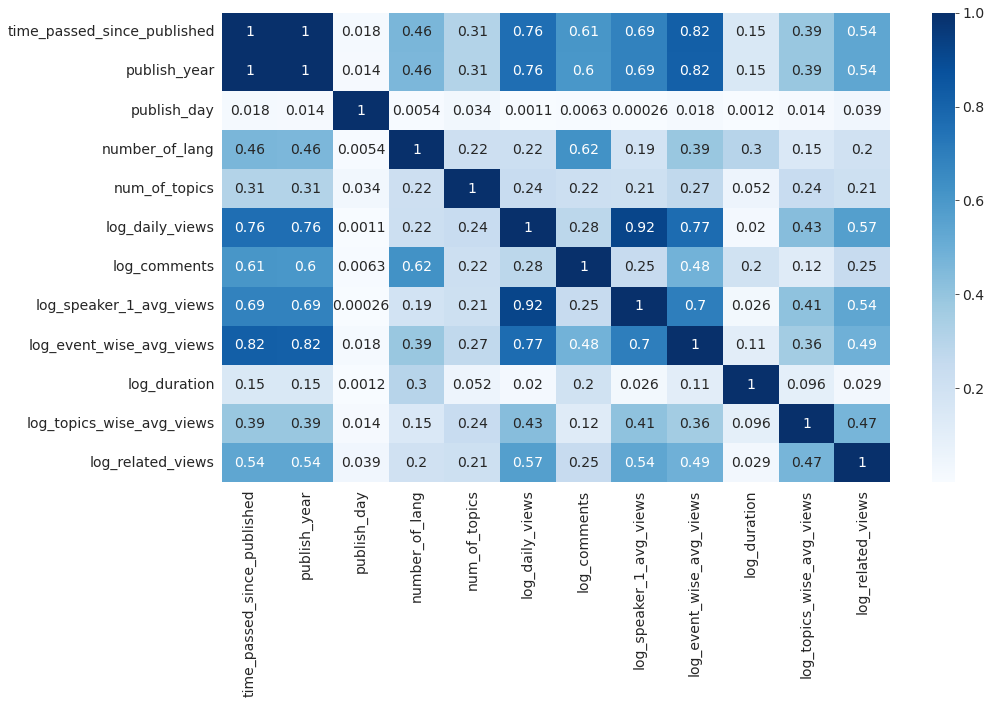

In [ ]:
# Heatmap to explore collinearity

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(np.abs(df_filtered.corr()), annot= True, cmap= 'Blues',ax=ax)
plt.show()

There dataframe is slightly multi-collinear.

#### 5. Variance inflation factor (VIF) analysis

In [ ]:
vif_data=df_filtered.drop(['publish_week_day','publish_month','log_daily_views','publish_year','number_of_lang','log_comments','log_related_views','log_topics_wise_avg_views','log_duration','log_event_wise_avg_views'],axis=1)

In [ ]:
# Calculate VIF

vif_df=pd.DataFrame()
vif_df['features']=vif_data.columns
vif_df['VIF']=[variance_inflation_factor(vif_data.values,i) for i in range(vif_data.shape[1])]
vif_df

,features,VIF
0,time_passed_since_published,2.836478
1,publish_day,4.118403
2,num_of_topics,5.792864
3,log_speaker_1_avg_views,9.543714


We have taken the VIF limit 10



#### 6. Checking for Normal Distribution

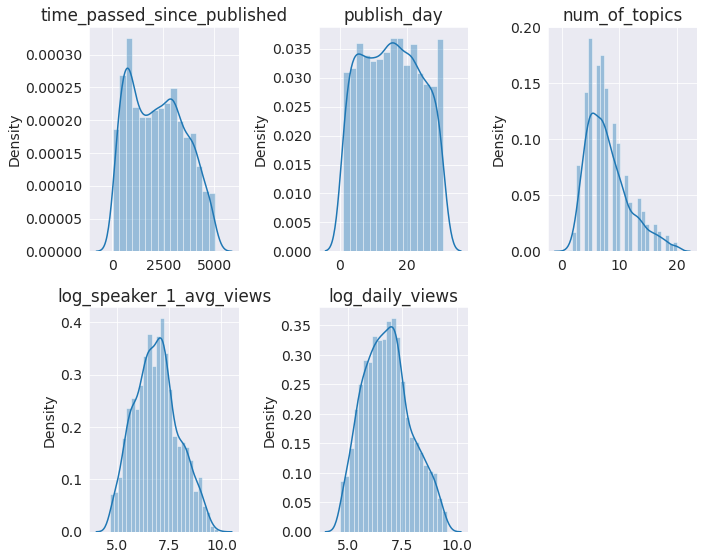

In [ ]:
# Ploting distributions of features

fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.title("time_passed_since_published")
sns.distplot(x= df_filtered['time_passed_since_published'])

plt.subplot(2,3,2)
plt.title("publish_day")
sns.distplot(x= df_filtered['publish_day'])

plt.subplot(2,3,3)
plt.title("num_of_topics")
sns.distplot(x= df_filtered['num_of_topics'])

plt.subplot(2,3,4)
plt.title("log_speaker_1_avg_views")
sns.distplot(x= df_filtered['log_speaker_1_avg_views'])

#plt.subplot(2,3,5)
#plt.title("log_daily_views")
#sns.histplot(x= np.log(df_filtered['related_views']))


plt.subplot(2,3,5)
plt.title("log_daily_views")
sns.distplot(x= df_filtered['log_daily_views'])

plt.tight_layout()
plt.show()

The distribution is close to normal distribution.

We will perform required operations on the following:

1. publish_day
2. num_of_topics
3. time_passed_since_day_published

##### Transformation to make the fit normally distributed

In [ ]:
# Transformation
df_filtered['sqrt_publish_day']=np.sqrt(df_filtered['publish_day'])
df_filtered['log_num_of_topics']=np.log(df_filtered['num_of_topics'])
df_filtered['log_time_passed_since_published']=np.log(df_filtered['time_passed_since_published'])

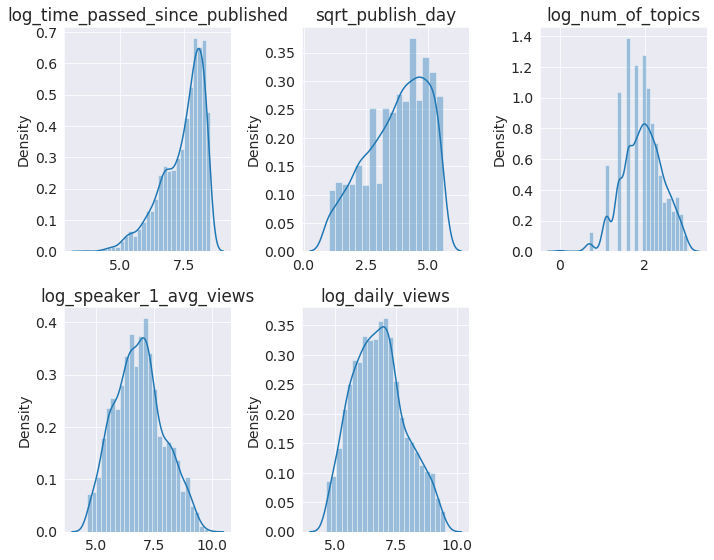

In [ ]:
# Ploting distributions of features

fig = plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
plt.title("log_time_passed_since_published")
sns.distplot(x= df_filtered['log_time_passed_since_published'])

plt.subplot(2,3,2)
plt.title("sqrt_publish_day")
sns.distplot(x= df_filtered['sqrt_publish_day'])

plt.subplot(2,3,3)
plt.title("log_num_of_topics")
sns.distplot(x= df_filtered['log_num_of_topics'])

plt.subplot(2,3,4)
plt.title("log_speaker_1_avg_views")
sns.distplot(x= df_filtered['log_speaker_1_avg_views'])

#plt.subplot(2,3,5)
#plt.title("log_daily_views")
#sns.histplot(x= np.log(df_filtered['related_views']))


plt.subplot(2,3,5)
plt.title("log_daily_views")
sns.distplot(x= df_filtered['log_daily_views'])

plt.tight_layout()
plt.show()

The distribution is NORMAL.

#### OLS Assumptions Verified

#### Preparing Final Datframe

In [ ]:
df_filtered.columns

Index(['time_passed_since_published', 'publish_month', 'publish_year',
       'publish_day', 'publish_week_day', 'number_of_lang', 'num_of_topics',
       'log_daily_views', 'log_comments', 'log_speaker_1_avg_views',
       'log_event_wise_avg_views', 'log_duration', 'log_topics_wise_avg_views',
       'log_related_views', 'sqrt_publish_day', 'log_num_of_topics',
       'log_time_passed_since_published'],
      dtype='object')

In [174]:
# Creating the final DF "data"

data=df_filtered.drop(['log_topics_wise_avg_views','time_passed_since_published','publish_year','log_duration','log_comments','log_event_wise_avg_views','number_of_lang','publish_day','num_of_topics','log_related_views'],axis=1)

In [175]:
data.columns

Index(['publish_month', 'publish_week_day', 'log_daily_views',
       'log_speaker_1_avg_views', 'sqrt_publish_day', 'log_num_of_topics',
       'log_time_passed_since_published'],
      dtype='object')

In [176]:
data.shape

(2778, 7)

### 2. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
data['log_daily_views'].describe()

count    2778.000000
mean        6.803528
std         1.081139
min         4.630807
25%         5.987681
50%         6.762236
75%         7.484023
max         9.519972
Name: log_daily_views, dtype: float64

In [ ]:
# Missing Values/Null Values Count

print(data.isnull().sum())

publish_month                      0
publish_week_day                   0
log_daily_views                    0
log_speaker_1_avg_views            0
sqrt_publish_day                   0
log_num_of_topics                  0
log_time_passed_since_published    0
dtype: int64


In [ ]:
# Removing NULL values from the dataset

data=data.dropna()

In [ ]:
data.shape

(2778, 7)

There are no missing values existing in our final dataframe

#### What all missing value imputation techniques have you used and why did you use those techniques?

After all the data manipulations, there are no remaining NULL values in our dataframe. 

Hence, no action is required.

### 3. Introducing Dummy Variables

In [ ]:
# We will be introducing Dummy Variables for categorical features

In [177]:
data_dummy=pd.get_dummies(data,drop_first=True)
data_dummy.shape
     

(2778, 22)

##### What all techniques have you used and why did you use those techniques?

We have used get_dummies function from pandas library to automatically create dummy variables and store it in a new DataFrame.

### 4. Defining Dependent and Independent Variables

In [178]:
y=data_dummy['log_daily_views']                 # dependent variable
X=data_dummy.drop(columns='log_daily_views')    # independent variables

In [179]:
# all the independent variables
X.head()

,log_speaker_1_avg_views,sqrt_publish_day,log_num_of_topics,log_time_passed_since_published,publish_month_Aug,publish_month_Dec,publish_month_Feb,publish_month_Jan,publish_month_Jul,publish_month_Jun,...,publish_month_May,publish_month_Nov,publish_month_Oct,publish_month_Sep,publish_week_day_Mon,publish_week_day_Sat,publish_week_day_Sun,publish_week_day_Thu,publish_week_day_Tue,publish_week_day_Wed
0,6.550687,5.196152,2.197225,8.528331,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,6.533668,5.196152,2.197225,8.528331,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,6.115464,5.196152,2.197225,8.528331,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,5.483391,3.162278,1.609438,8.525757,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
6,6.880248,3.162278,2.197225,8.525757,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


### 5. Standardizing the features

In [180]:
# Next we will standardize the features

scaler=StandardScaler()   # Preprocessing step - Stanadardization;     Mean = 0;     Std dev = 1;
scaler.fit(X)             # learns the parameters of the model that best fit the data
x=scaler.transform(X)     # This step is important to ensure that the new data is in the same format and has the same features as the training data

### 6. Splitting the data

Lets split the data into training and testing

In [181]:
# Spliting dataset into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## ***7. ML Model Implementation***

### ML Model - 1

Linear Regression and Error Metrices

In [ ]:
# ML Model - 1 Implementation

# Linear Regression Training Model

In [ ]:
# Regression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

#### Model Accuracy on Trained Data

In [ ]:
# making predictions

yhat=reg.predict(x_train)

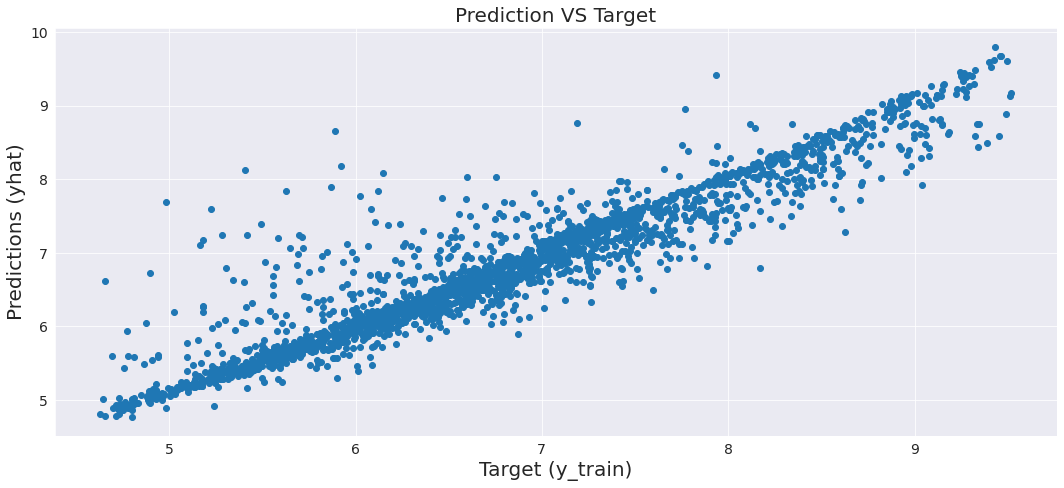

In [ ]:
# plot

plt.figure(figsize=(15,7))
plt.scatter(y_train,yhat)
plt.xlabel('Target (y_train)',fontsize=20)
plt.ylabel('Predictions (yhat)',fontsize=20)
plt.title('Prediction VS Target',fontsize=20)
plt.show()

Scatter plot must be as close to the 45 degree line from origin as possible for best predictions.

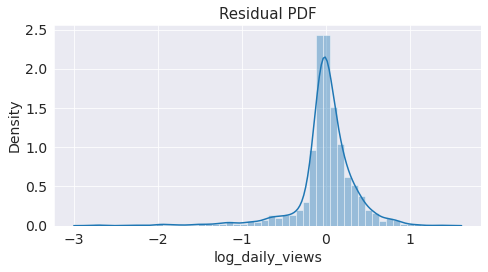

In [ ]:
# Other way to judge the model
sns.distplot(y_train-yhat)
plt.title('Residual PDF',fontsize=15)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:

# R-square to explain the variability our model id able to explain
R2=reg.score(x_train,y_train)
R2

0.8848059152270258

In [ ]:
# Adjusted R-square
n=len(x_train)
p=x_train.shape[1]
adj_r_sqr=1-((1-reg.score(x_train,y_train))*(n-1)/(n-p-1))
adj_r_sqr

0.8837063353269201

In [ ]:
variability_df=pd.DataFrame({"R-Square":R2,"Adjusted R-Square":adj_r_sqr},index=["Values"])
variability_df

,R-Square,Adjusted R-Square
Values,0.884806,0.883706


#### Model parameters - Checking weights of the features

In [ ]:
# Intercept

reg.intercept_


6.8126142533288565

In [ ]:
# Rest of the parameters

summary=pd.DataFrame({'Features':X.columns,'Weight':reg.coef_})
summary

,Features,Weight
0,log_speaker_1_avg_views,0.801592
1,sqrt_publish_day,0.001683
2,log_num_of_topics,0.007109
3,log_time_passed_since_published,-0.269520
4,publish_month_Aug,-0.015809
5,publish_month_Dec,-0.018920
6,publish_month_Feb,-0.010206
7,publish_month_Jan,-0.023264
8,publish_month_Jul,-0.007396
9,publish_month_Jun,-0.017711


*Wieghts Interpretation*
*Continuous Variable*
1. A *positive wieght* shows that as the feature increases in values so does the daily_views and log_daily_views variables.
2. A *negative wieght* shows that as the feature increases in values the daily_views and log_daily_views variables decreses in values.

*Dummy Variables*
1. A *positive wieght* shows that the respective catagory is more expensive than the benchmark
2. A *negative wieght* shows that the respective catagory is less expensive than the benchmark

#### Testing our Linear Regression Model

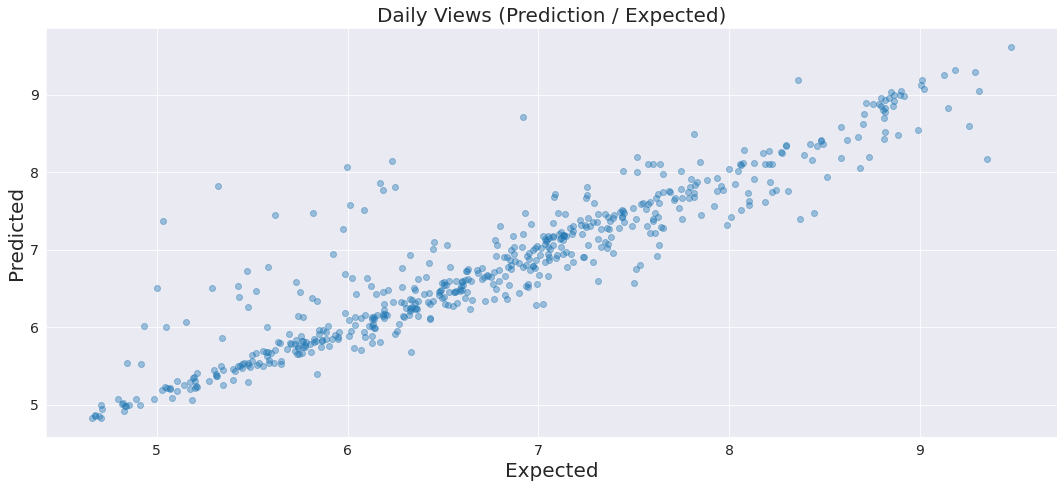

In [ ]:
# Testing plot

yhat_test=reg.predict(x_test)
plt.figure(figsize=(15,7))
plt.scatter(y_test,yhat_test,alpha=0.4)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)
plt.show()

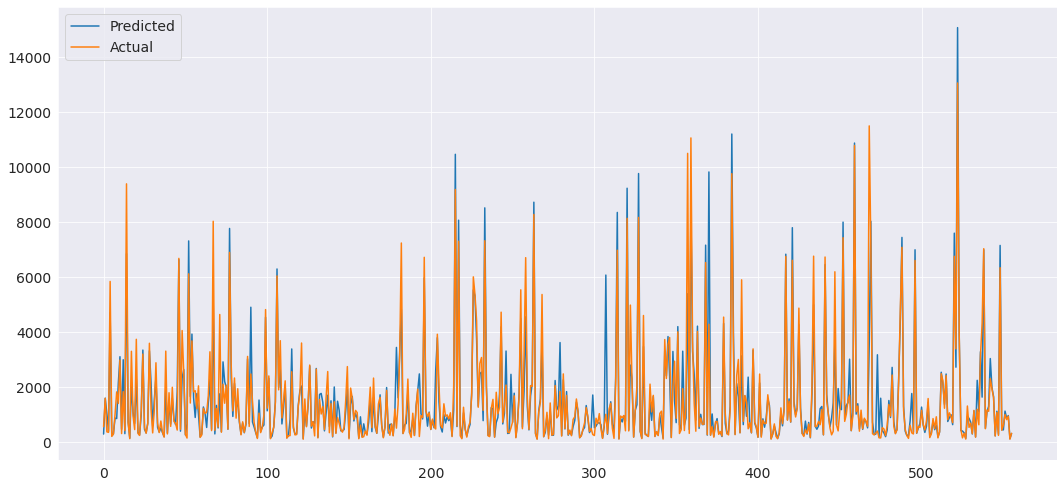

In [ ]:
# Simple plot to distinguish predicted vs expected

plt.figure(figsize=(15,7))
plt.plot(np.exp(yhat_test))
plt.plot(np.array(np.exp(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
pf_df=pd.DataFrame({'Predictions':np.exp(yhat_test)})
pf_df.head()

,Predictions
0,292.659196
1,1597.501605
2,1032.692523
3,391.032656
4,4707.366067


In [ ]:
y_test=y_test.reset_index(drop=True)
pf_df['Target(expected values)']=np.exp(y_test)

In [ ]:
pf_df.head()


,Predictions,Target(expected values)
0,292.659196,561.889745
1,1597.501605,1594.749129
2,1032.692523,374.479636
3,391.032656,355.009864
4,4707.366067,5842.726994


In [ ]:
pf_df['Residual']=pf_df['Target(expected values)']-pf_df['Predictions']
pf_df['Difference_percentage']=np.absolute(pf_df['Residual']/pf_df['Target(expected values)']*100)
pf_df.describe()

,Predictions,Target(expected values),Residual,Difference_percentage
count,556.000000,556.000000,556.000000,556.000000
mean,1558.464953,1569.618552,11.153599,34.426190
std,1952.506659,2000.493085,807.800770,92.005888
min,124.517270,105.765362,-5537.953168,0.172596
25%,421.073368,383.935951,-98.667516,5.711352
50%,858.854174,867.694551,-5.588189,12.110942
75%,1758.849020,1740.096656,115.990140,28.354614
max,15072.603881,13058.185841,7947.210602,1115.118477


Error percentage is very less between 25 quartile to 75 quartile that shows our model is working very good on test data.

#### 2. Error Metrices

In [ ]:
#  Error Metrices

In [ ]:
# MSE 

MSE=mean_squared_error(np.exp(y_test), np.exp(yhat_test))


In [ ]:
# RMSE

RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(yhat_test)))

In [ ]:
# Mean Absolute Error 
#MAE

sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(yhat_test[ele]))
  
MAE = sum/n
  
# display
print("Mean absolute error : " + str(MAE))

Mean absolute error : 368.3338870583571


In [ ]:
# MAPE

MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(yhat_test))

In [ ]:
# R2 and Adj. R2

r2 = r2_score(np.exp(y_test), np.exp(yhat_test))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(yhat_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
# Printing all error metrices

error_metric=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric

,Values
R-Square,0.836914
Adj. R-Square,0.830500
MSE,651492.850559
RMSE,807.151070
MAE,368.333887
MAPE,0.344262


Error metrices show the same observation of low error in the test dataset.

##### Which error technique have you used and why?

We have checked all error metrics on the Linear Regression Model. And all methods show similar observations.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Since this is our first model, we will use these metrics as a standard to compare other models.

### ML Model - 2

Lasso Regression Model and CV

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Let's check for Overfitting

In [ ]:
# Lasso Regression 

# Running Grid Search CV

# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.13784216080783124


In [ ]:
y_pred_lasso = lasso_regressor.predict(x_test)

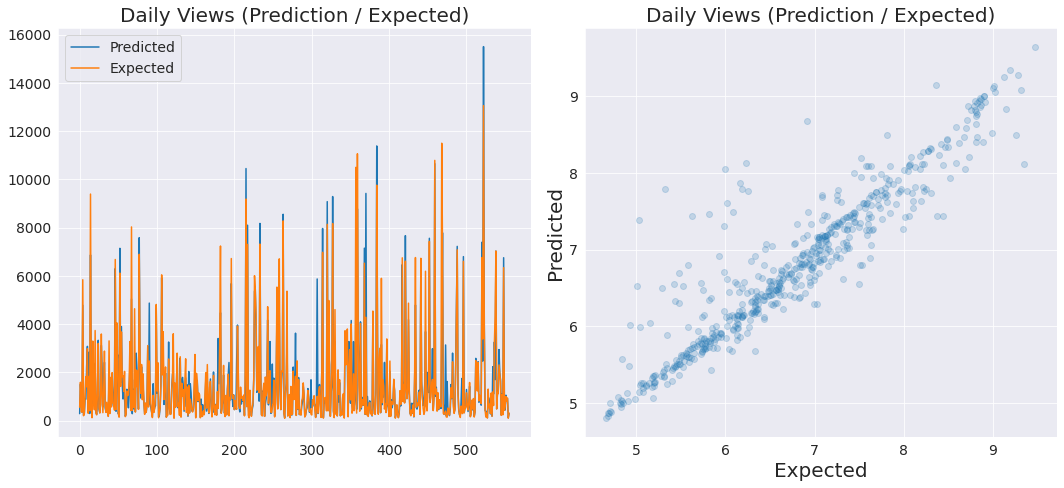

In [ ]:
# Plotting

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_lasso))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_lasso,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

#### 2. Error metrics

In [ ]:
# Mean Squared Error

MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso))

In [ ]:
# Root MSE

RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_lasso)))


In [ ]:
# Mean Absolute Error
sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(y_pred_lasso[ele]))
  
MAE = sum/n

In [ ]:
# Mean Absolute Percentage Error

MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred_lasso))


In [ ]:
r2 = r2_score(np.exp(y_test), np.exp(y_pred_lasso))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(y_pred_lasso)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
# Tabulating all error metrics

error_metric_lasso=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric_lasso

,Values
R-Square,0.836294
Adj. R-Square,0.829856
MSE,653968.194183
RMSE,808.683000
MAE,363.179629
MAPE,0.341139


In [ ]:
# End of Lasso

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Compared to Linear Regression, the error reading are similar, but slightly higher.

### ML Model - 3

Ridge Regression Model and CV

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Ridge Regression 

# Running Grid Search Cross Validation

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Checking for the best fit

print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.13915204486777222


In [ ]:
# Model Prediction

y_pred_ridge = ridge_regressor.predict(x_test)

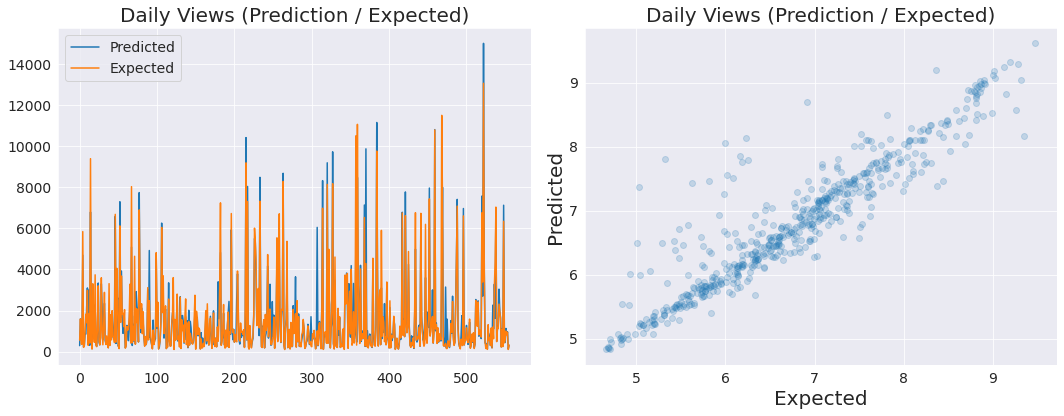

In [ ]:
# plotting

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_ridge))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_ridge,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

#### 2. Error metrics

In [ ]:
# MSE

MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge))

In [ ]:
# RMSE

RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_ridge)))

In [ ]:
# Mean Absolute Error
sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(y_pred_ridge[ele]))
  
MAE = sum/n

In [ ]:
# MAPE

MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred_ridge))

In [ ]:
# R2 and Adj R2

r2 = r2_score(np.exp(y_test), np.exp(y_pred_ridge))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(y_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
# tabulating all metrics

error_metric_ridge=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric_ridge

,Values
R-Square,0.836137
Adj. R-Square,0.829693
MSE,654594.550683
RMSE,809.070177
MAE,368.714446
MAPE,0.343861


In [ ]:
# Ridge complete

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing our Ridge Model with our standard Linear Regression Model, the error values are similar but they are still slightly higher.

### ML Model - 4

Elastic Net Model and CV

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Elastic Regression 

# Running Grid Search Cross Validation

In [ ]:
# Hyperprarameter tuning
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
# Checking for the best fit

print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01, 'l1_ratio': 0.8}

Using  {'alpha': 0.01, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.13806251614640414


In [ ]:
# Model Prediction

y_pred_elastic = elastic_regressor.predict(x_test)


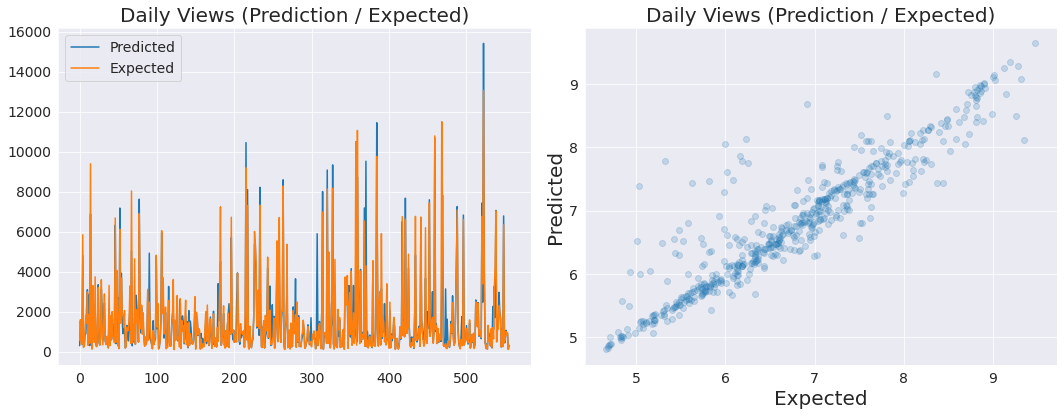

In [ ]:
# plotting

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(np.exp(y_pred_elastic))
plt.plot(np.exp(np.array(y_test)))
plt.legend(["Predicted","Expected"])
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.subplot(1,2,2)
yhat_test=reg.predict(x_test)
plt.scatter(y_test,y_pred_elastic,alpha=0.2)
plt.xlabel('Expected',fontsize=20)
plt.ylabel('Predicted',fontsize=20)
plt.title('Daily Views (Prediction / Expected)',fontsize=20)

plt.tight_layout()
plt.show()

#### 2. Error metrics

In [ ]:
# MSE

MSE=mean_squared_error(np.exp(y_test), np.exp(y_pred_elastic))

In [ ]:
# RMSE

RMSE=math.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred_elastic)))


In [ ]:
# Mean Absolute Error

sum = 0
n=len(y_test)
# for loop for iteration
for ele in range(n):
    sum += abs(np.exp(y_test[ele]) - np.exp(y_pred_elastic[ele]))
  
MAE = sum/n
  

In [ ]:
# MAPE

MAPE=mean_absolute_percentage_error(np.exp(y_test),np.exp(y_pred_elastic))


In [ ]:
# R2 and Adj R2

r2 = r2_score(np.exp(y_test), np.exp(y_pred_elastic))
ar2=1-(1-r2_score(np.exp(y_test), np.exp(y_pred_elastic)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))

In [ ]:
# tabulating all metrics

error_metric_Elastic=pd.DataFrame({'Values':[r2,ar2,MSE,RMSE,MAE,MAPE]},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])
error_metric_Elastic

,Values
R-Square,0.835447
Adj. R-Square,0.828975
MSE,657353.959269
RMSE,810.773679
MAE,364.641960
MAPE,0.341332


In [ ]:
# ElasticNet complete

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Comparing our ElasticNet Model with our standard Linear Regression Model, the error values are similar but they are still slightly higher.

### Which ML model did you choose from the above created models as your final prediction model and why?

Let us compare error metrics of all the Models.

In [ ]:
# Summarizing Error metrics

Model_Summary=pd.DataFrame({'Linear Regression':error_metric['Values'],'Lasso':error_metric_lasso['Values'],'Ridge':error_metric_ridge['Values'],'Elastic':error_metric_Elastic['Values']},index=['R-Square','Adj. R-Square','MSE','RMSE','MAE','MAPE'])

In [ ]:
Model_Summary

,Linear Regression,Lasso,Ridge,Elastic
R-Square,0.836914,0.836294,0.836137,0.835447
Adj. R-Square,0.830500,0.829856,0.829693,0.828975
MSE,651492.850559,653968.194183,654594.550683,657353.959269
RMSE,807.151070,808.683000,809.070177,810.773679
MAE,368.333887,363.179629,368.714446,364.641960
MAPE,0.344262,0.341139,0.343861,0.341332


On comparing all the models our base linear regression model is still is performing better followed by Lasso, Ridge and ElasticNet Regression model on the basis of RMSE. But our model contains large number of outliers and the value of RMSE is affected by outliers therefore we will use MAE as our evaluation matrix according to which Lasso Regressor has the best performance

## ***8.*** ***Future Work (Optional)***

#### Future Work

Training our data on other models (XGB, Random Forest, etc).

More efficiant Hyperparameter Tuning through techniques like Random Search.

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [189]:
# Save the File

# Lasso Regression 

# Running Grid Search CV

# Cross validation
model = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(model, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)

# Save the model to a file using pickle
filename = 'lasso_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [193]:
# Load the saved model from the pickle file
with open(filename, 'rb') as file:
    model = pickle.load(file)

# Load some new data for prediction
X_new = [[7      , 3         , 2         , 8         , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        ]]

# Fit the loaded model on some training data
model.fit(x_train, y_train)

# Predict the output for the new data using the loaded model
y_pred = lasso_regressor.predict(X_new)

print(y_pred)


[10.28796742]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

That's it we have reached the end of this project. We started the project with Data Exploration in which we faced many challenges as dataset included data in many different data structures which was bit complicated to extract but the most challenging part of EDA was dealing catagorical variables, it took lot of research to deal with such large number of catagorical variables. Following EDA we performed feature engineering, data cleaning, target encoding and one hot encoding of categorical columns, feature selection and then model building.

Then we checked our model for overfitting by comparing it with Lasso Regression model, Ridge Regression model, ElasticNet Regression model.

We found that our orignal base model was overfit and Lasso Regressor has the best accuracy.

In all of these models our mean errors have been around 34 % but we will consider the median error percentage, which is 13 %, to measure the accuracy because of the outliers. That implies we have been able to correctly predict views 87 % of the time.

After hyper parameter tuning, we have prevented overfitting and decreased errors by regularizing.

Given that only have 13 % errors, our models have performed very well on unseen data due to various factors like effecive EDA,feature selection,correct model selection.

In all the features speaker_1_avg_views is most important this implies that speakers are directly impacting the views.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***